In [3]:

import pandas as pd
import statsmodels.api as sm


In [4]:
# 第 2 步：讀取資料

file_path = "Data/Real estate.csv"  # 請依實際路徑調整
df = pd.read_csv(file_path)

# 查看前幾筆資料
# df.head()

# 查看資料的基本資訊（欄位型態、缺失值等）
df.info()

# 查看各數值欄位的基本統計量
# df.describe()
df.describe().round(3) # 讓小數點到第三四捨五入

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,207.500,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,119.656,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,1.000,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,104.250,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,207.500,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,310.750,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,414.000,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


In [5]:
# 定義變數名稱

# 目標變數（因變數）
Y = df["Y house price of unit area"]

# 自變數（X）：不包含 No 與目標變數
X = df[[
    "X1 transaction date",
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude"
]]

# 加上常數項（Intercept）
X = sm.add_constant(X)

X.head()


,const,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1.0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,1.0,2012.917,19.5,306.59470,9,24.98034,121.53951
2,1.0,2013.583,13.3,561.98450,5,24.98746,121.54391
3,1.0,2013.500,13.3,561.98450,5,24.98746,121.54391
4,1.0,2012.833,5.0,390.56840,5,24.97937,121.54245


In [6]:
# 建立一個 OLS（最小平方法）線性迴歸模型
# Y 是依變數（目標變數）
# X 是自變數（解釋變數，通常要先加入截距常數項）
model = sm.OLS(Y, X)

# 使用 .fit() 進行模型估計（求出迴歸係數、p-value、R² 等）
results = model.fit()

# 印出完整的模型摘要（包含係數、R²、F 檢定、p-value 等資訊）
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Wed, 26 Nov 2025   Prob (F-statistic):           4.86e-74
Time:                                11:11:41   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.444e+04   6775.671     -2.131      0.034   -2.78e+04   -1117.421
X1 transaction date                        5.1462      1.557      3.305      0.001       2.085       8.207
X2 house age                              -0.2697      0.039     -7.000      0.000      -0.345      -0.194
X3 distance to the nearest MRT station    -0.0045      0.001     -6.250      0.000      -0.006      -0.003
X4 number of convenience stores            1.1333      0.188      6.023      0.000       0.763       1.503
X5 latitude                              225.4730     44.567      5.059      0.000     137.863     313.083
X6 longitude                             -12.4236     48.582     -0.256      0.798    -107.927      83.079
==============================================================================
Omnibus:                      231.634   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3599.138
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      16.865   Cond. No.                     3.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# 第 6 部分：迴歸係數與 p-value（保留四位小數）

coeff_table = pd.DataFrame({
    "Variable": results.params.index,
    "Coefficient": results.params.round(4),
    "p-value": results.pvalues.round(4)
})

coeff_table


,Variable,Coefficient,p-value
const,const,-14437.1008,0.0337
X1 transaction date,X1 transaction date,5.1462,0.0010
X2 house age,X2 house age,-0.2697,0.0000
X3 distance to the nearest MRT station,X3 distance to the nearest MRT station,-0.0045,0.0000
X4 number of convenience stores,X4 number of convenience stores,1.1333,0.0000
X5 latitude,X5 latitude,225.4730,0.0000
X6 longitude,X6 longitude,-12.4236,0.7983


In [10]:
# !sudo apt-get install -y fonts-noto-cjk
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK'


findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font family 'Noto Sans CJK' not found.
findfont: Font famil

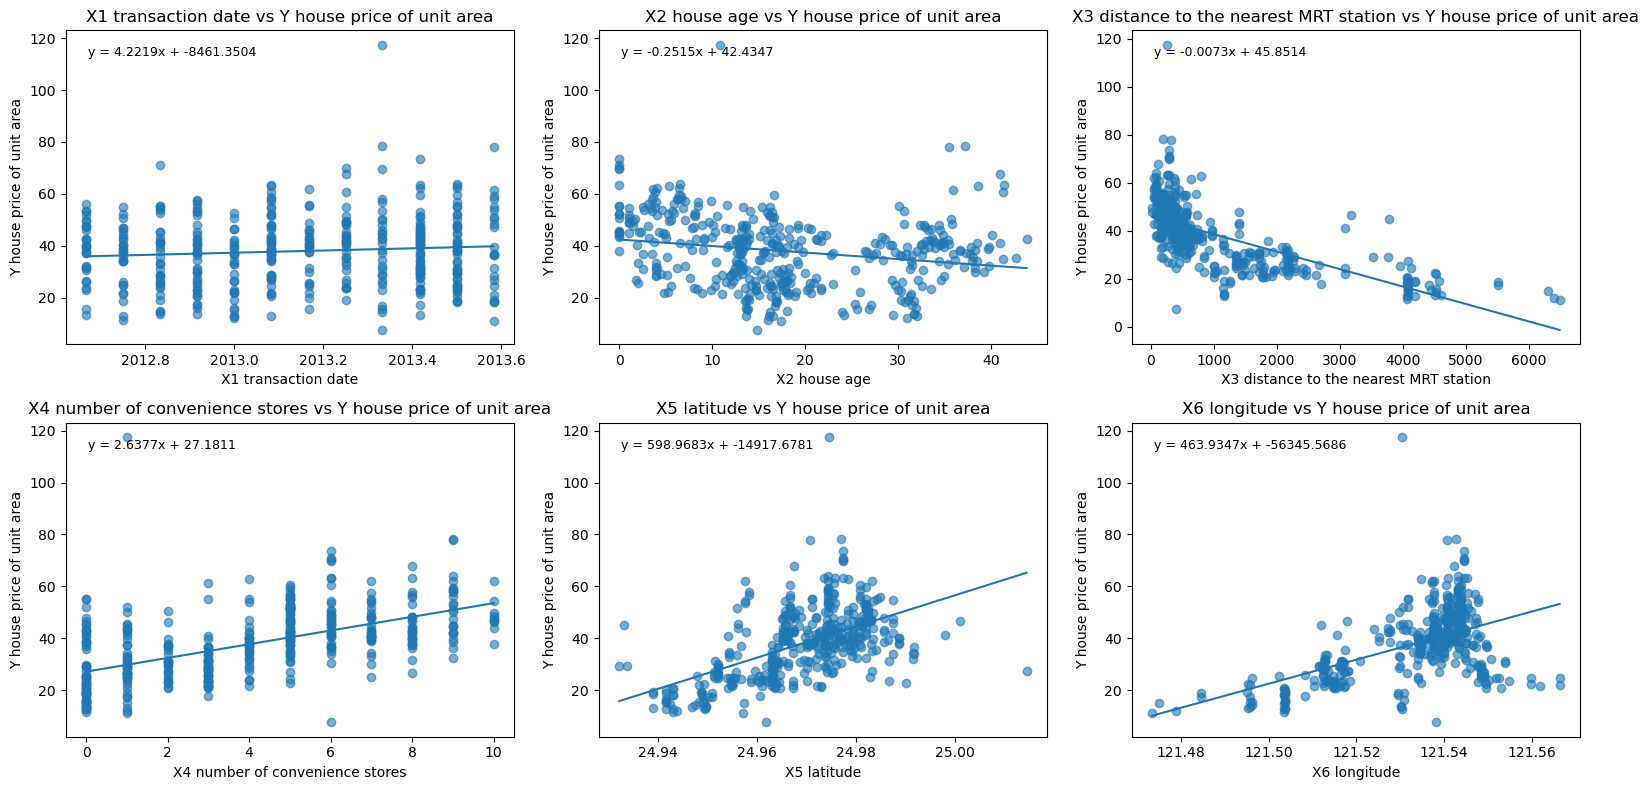

In [ ]:
# Features and target (make sure these names match your previous code)
target_col = "Y house price of unit area"

feature_cols = [
    "X1 transaction date",
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude"
]

# Create subplots: adjust rows/cols if you change the number of features
n_features = len(feature_cols)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 8))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(feature_cols):
    ax = axes[i]

    x = df[col].values
    y = df[target_col].values

    # Fit a simple linear regression line: y = slope * x + intercept
    slope, intercept = np.polyfit(x, y, 1)

    # Create points for the trend line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept

    # Scatter plot
    ax.scatter(x, y, alpha=0.6)

    # Trend line
    ax.plot(x_line, y_line)

    # Axis labels and title (English)
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)
    ax.set_title(f"{col} vs {target_col}")

    # Equation text (English), place in upper left area
    eq_text = f"y = {slope:.4f}x + {intercept:.4f}"
    ax.text(0.05, 0.95, eq_text,
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='top')

# Hide any unused subplots (in case n_features is not multiple of n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
